In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 1. Load Data Set

## MNIST

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.


In [2]:
mnist = fetch_openml("mnist_784", as_frame = False)

In [3]:
X,y = mnist.data, mnist.target

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

<function matplotlib.pyplot.show(close=None, block=None)>

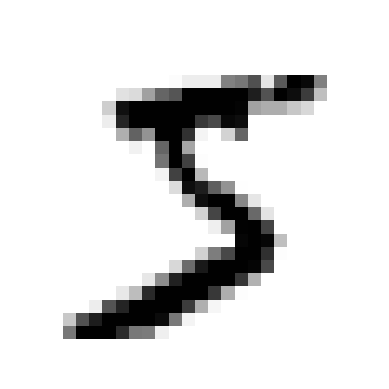

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(X[0])
plt.show

In [9]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# 2. Training a Binary Classifier

Lets simplify the problem for now and only try to identify one digit.

In [10]:
y_train_5 = (y_train == '5')
y_train_5

array([ True, False, False, ...,  True, False, False])

In [11]:
y_test_5 = (y_test == '5')
y_test_5

array([False, False, False, ..., False,  True, False])

In [12]:
from sklearn.linear_model import SGDClassifier

sgdClassify = SGDClassifier(random_state=42)
sgdClassify.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [13]:
sgdClassify.predict(X[:10])

array([ True, False, False, False, False, False, False, False, False,
       False])

## 3. Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend most of this chapter.

Đánh giá một bộ phân loại thường khó khăn hơn đáng kể so với việc đánh giá một bộ hồi quy, vì vậy chúng ta sẽ dành phần lớn của chương này cho việc này.


## 3.1 Measuring Accuracy Using Cross-Validation
A good way to evaluate a model is to use cross-validation, just as you did in Chapter 2. Let’s use the `cross_val_score()` function to evaluate our `SGDClassifier` model, using k-fold cross-validation with three folds. Remember that **k-fold cross-validation** means splitting the training set into k folds (in this case, three), then training the model k times, holding out a different fold each time for evaluation (see Chapter 2).

Một cách tốt để đánh giá một mô hình là sử dụng phương pháp **cross-validation**, giống như bạn đã làm trong Chương 2. Hãy sử dụng hàm `cross_val_score()` để đánh giá mô hình `SGDClassifier` của chúng ta, sử dụng kỹ thuật **k-fold cross-validation** với ba phần. Nhớ rằng **k-fold cross-validation** có nghĩa là chia tập huấn luyện thành k phần (trong trường hợp này, ba phần), sau đó huấn luyện mô hình k lần, giữ một phần tử khác nhau trong mỗi lần để đánh giá (xem Chương 2).


In [14]:
cross_val_score(sgdClassify,X_train,y_train_5,cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Chà! Trên 95% độ chính xác (tỷ lệ dự đoán đúng) trên tất cả các lần chia tập kiểm tra? Điều này thật tuyệt vời, đúng không? Nhưng trước khi bạn quá phấn khích, hãy cùng xem một mô hình giả chỉ đơn giản phân loại tất cả các hình ảnh vào lớp phổ biến nhất, trong trường hợp này là lớp âm (tức là không phải số 5):

In [15]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # in ra False: không có số 5 nào được phát hiện
cross_val_score(dummy_clf,X_train,y_train_5,cv=3, scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

Điều này cho thấy tại sao độ chính xác (accuracy) thường không phải là thước đo hiệu suất ưu tiên cho các bộ phân loại, đặc biệt khi bạn đang xử lý các tập dữ liệu mất cân bằng (tức là khi một số lớp xuất hiện nhiều hơn các lớp khác). Một cách tốt hơn nhiều để đánh giá hiệu suất của một bộ phân loại là nhìn vào ma trận nhầm lẫn (confusion matrix - CM).

## 3.2 Confusion Matrices - Ma trận Nhầm Lẫn

Ma trận nhầm lẫn là một bảng tóm tắt kết quả phân loại. Nó giúp bạn hiểu chi tiết về cách mô hình phân loại các điểm dữ liệu:

- **True Positive (TP)**: Số mẫu đúng thực sự được dự đoán đúng (Ví dụ: số 5 được dự đoán là số 5).
- **True Negative (TN)**: Số mẫu không phải số 5 và được dự đoán đúng là không phải số 5.
- **False Positive (FP)**: Số mẫu không phải số 5 nhưng lại được dự đoán là số 5.
- **False Negative (FN)**: Số mẫu số 5 nhưng lại được dự đoán là không phải số 5.

### Ma trận Nhầm Lẫn

|                        | Dự đoán: Không phải số 5 | Dự đoán: Số 5    |
|------------------------|--------------------------|------------------|
| **Thực tế: Không phải số 5** | TN                       | FP               |
| **Thực tế: Số 5**              | FN                       | TP               |

### Các Chỉ Số Từ Ma Trận Nhầm Lẫn

Từ ma trận nhầm lẫn, chúng ta có thể tính được nhiều chỉ số quan trọng hơn:

1. **Precision (Độ Chính Xác của Dự Đoán)**: Tỷ lệ giữa số mẫu dự đoán đúng là số 5 trên tổng số mẫu được dự đoán là số 5.
       $$\text{Precision} = \frac{TP}{TP + FP}$$

3. **Recall (Độ Nhớ)**: Tỷ lệ giữa số mẫu dự đoán đúng là số 5 trên tổng số mẫu thực sự là số 5.
   $$\text{Recall} = \frac{TP}{TP + FN}$$

4. **F1 Score**: Trung bình điều hòa của Precision và Recall, hữu ích khi bạn cần cân bằng giữa Precision và Recall.
   $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

### Kết Luận

Độ chính xác không phải lúc nào cũng là chỉ số tốt nhất, đặc biệt khi dữ liệu mất cân bằng. Ma trận nhầm lẫn và các chỉ số liên quan như Precision, Recall, và F1 Score cung cấp một cái nhìn rõ ràng và chi tiết hơn về hiệu suất của mô hình phân loại.


In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgdClassify,X_train,y_train_5,cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_train_pred)
cm          

array([[53892,   687],
       [ 1891,  3530]])

- **TN**: 53892 (đúng với dự đoán không phải số 5)
- **FP**: 687 (không có mẫu không phải số 5 nào được dự đoán là số 5)
- **FN**: 1891 (tất cả mẫu số 5 được dự đoán là không phải số 5)
- **TP**: 3530 (không có mẫu số 5 nào được dự đoán đúng)

Ma trận nhầm lẫn sẽ như sau:

|                        | Dự đoán: Không phải số 5 | Dự đoán: Số 5    |
|------------------------|--------------------------|------------------|
| **Thực tế: Không phải số 5** | 53892                     | 687                |
| **Thực tế: Số 5**              | 1891                     | 3530                |

In [18]:
from sklearn.metrics import precision_score, recall_score

print("Trong total",cm[0][1]+cm[1][1]," du doan la so 5 chi co",precision_score(y_train_5,y_train_pred),"thuc te la so 5")
#precision_score(y_train_5, y_train_pred)
print("Trong total",cm[1][0]+cm[1][1]," thuc te la so 5 chi co",recall_score(y_train_5,y_train_pred),"thuc te la so 5")
# recall_score(y_train_5, y_train_pred)

Trong total 4217  du doan la so 5 chi co 0.8370879772350012 thuc te la so 5
Trong total 5421  thuc te la so 5 chi co 0.6511713705958311 thuc te la so 5


In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

## Trade-off Giữa Precision và Recall

Không thể tăng đồng thời cả precision và recall. Khi tăng precision (giảm số dương tính giả), recall có thể giảm (tăng số âm tính giả) và ngược lại. Đây là sự cân bằng giữa precision và recall.

## Ví Dụ Minh Họa

1. **Phát Hiện Video An Toàn Cho Trẻ Em**:
    - **Ưu tiên precision**: Bạn muốn đảm bảo rằng tất cả các video được phân loại là an toàn thực sự là an toàn. Bạn chấp nhận bỏ sót một số video an toàn (low recall) miễn là các video được chọn đều an toàn (high precision).

2. **Phát Hiện Kẻ Trộm Trong Hình Ảnh Giám Sát**:
    - **Ưu tiên recall**: Bạn muốn đảm bảo rằng hầu hết các kẻ trộm đều bị phát hiện, ngay cả khi điều này dẫn đến một số cảnh báo giả (low precision). Điều này có nghĩa là recall cao quan trọng hơn precision.

## Sử Dụng Precision và Recall Phù Hợp

- **Khi Precision Quan Trọng**:
    - Trong các trường hợp bạn muốn đảm bảo rằng các kết quả dương tính thực sự là đúng, như phát hiện email spam, hoặc kiểm duyệt nội dung.
    - **Ví dụ**: Kiểm duyệt nội dung trên nền tảng video.

- **Khi Recall Quan Trọng**:
    - Trong các trường hợp bạn muốn đảm bảo rằng bạn không bỏ sót bất kỳ kết quả dương tính nào, như phát hiện bệnh trong y tế hoặc tìm kiếm cứu hộ.
    - **Ví dụ**: Phát hiện bệnh nhân có triệu chứng nguy hiểm trong hệ thống y tế.
```

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions.

In [20]:
#tinh toan diem so choooo X[0]
yScores = sgdClassify.decision_function([X[0]])
yScores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (yScores > threshold)
y_some_digit_pred

array([ True])

In [22]:
#change the threshold to 3000
threshold = 3000
y_some_digit_pred = (yScores > threshold)
y_some_digit_pred
# thang threshhold = 0 thi X[0] ben phai -> True. but threshold = 300 thi X[0] ben trai -> False

array([False])

### How do you decide which threshold to use?
First, use the `cross_val_predict()` function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:


In [23]:
yScores = cross_val_predict(sgdClassify, X_train, y_train_5, cv = 3,method="decision_function")

In [24]:
#get score cua tung diem tren tap du lieu
yScores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

With these scores, use the `precision_recall_curve()` to compute precision and recall for all possible thresholds 

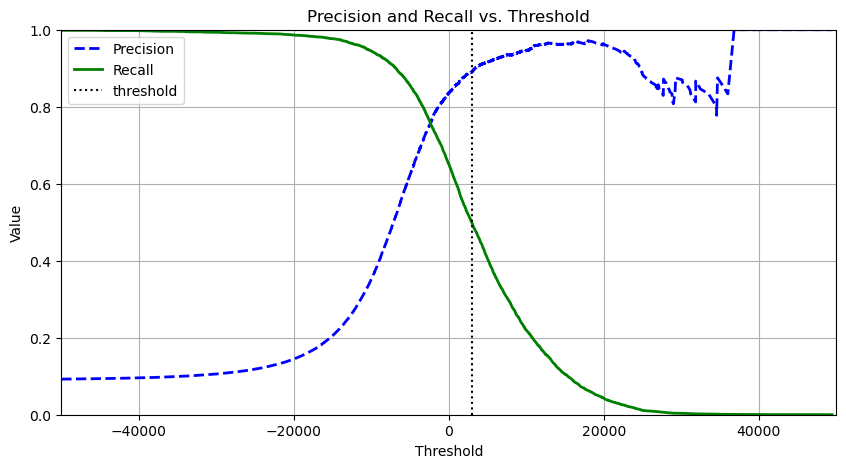

In [25]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,yScores)
#precisions.shape
plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid()
plt.legend(loc="best")
plt.xlabel("Threshold")        # Label for the x-axis
plt.ylabel("Value")            # Label for the y-axis
plt.title("Precision and Recall vs. Threshold")  # Title for the plot
plt.axis([-50000,50000,0,1])
##[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show()

In [26]:
#get index with the maximum precision
indexFor90Precision = (precisions >= 0.9).argmax()
threshold90Precision = thresholds[indexFor90Precision]
threshold90Precision

3370.0194991439557

In [27]:
y_train_90_pred = (yScores >= threshold90Precision)
y_train_90_pred

array([False, False, False, ...,  True, False, False])

## 3.3 The ROC Curve

**The receiver operating characteristic (ROC) curve** is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the **true positive rate** (another name for recall) against the **false positive rate (FPR)**. The FPR (also called the fall-out) is the ratio of negative instances that are incorrectly classified as positive. It is equal to 1 – the **true negative rate (TNR)**, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity.


In [28]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5, yScores)

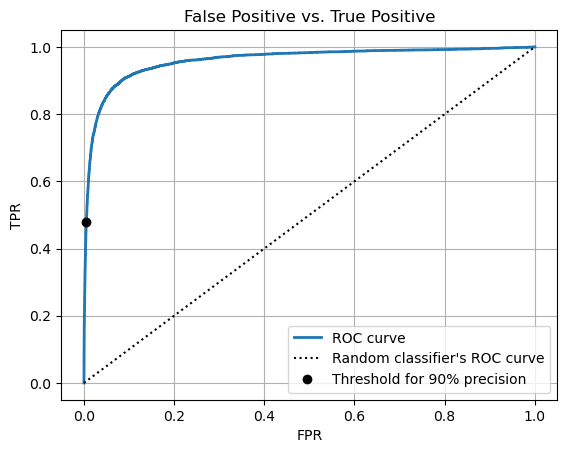

In [29]:
idx_for_threshold_at_90 = (thresholds <= threshold90Precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
##[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.grid()
plt.legend(loc="best")
plt.xlabel("FPR")        # Label for the x-axis
plt.ylabel("TPR")            # Label for the y-axis
plt.title("False Positive vs. True Positive")  # Title for the plot
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

forestClassi = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forestClassi, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest
## first columns is for negative class, while the second column is for positive class)
## we only need to get the second column

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [31]:
preForest, recallForest, thresholdForest = precision_recall_curve(y_train_5,y_probas_forest[:,1])
preForest

array([0.09035   , 0.15601796, 0.21697018, 0.2782198 , 0.3359375 ,
       0.39168474, 0.4434341 , 0.49221099, 0.53883011, 0.58103448,
       0.62384152, 0.65814579, 0.69354839, 0.72090213, 0.74856904,
       0.77310803, 0.79370733, 0.81468478, 0.83029737, 0.84566529,
       0.8605178 , 0.87232994, 0.88209825, 0.89121268, 0.90208833,
       0.90986159, 0.9178634 , 0.92464178, 0.93120086, 0.93672255,
       0.94127273, 0.94605505, 0.95223107, 0.95618941, 0.95927941,
       0.96257089, 0.96431961, 0.96689629, 0.96939365, 0.97113522,
       0.97292032, 0.975495  , 0.97634069, 0.9787572 , 0.98101519,
       0.98323571, 0.98412375, 0.98566455, 0.98719273, 0.98773389,
       0.98974681, 0.99050833, 0.99129327, 0.99186644, 0.99180858,
       0.99259582, 0.99340804, 0.99378606, 0.99440841, 0.99458239,
       0.99474526, 0.99514451, 0.99555659, 0.99622997, 0.99618594,
       0.99638031, 0.9965661 , 0.99652605, 0.99672462, 0.99692938,
       0.99688393, 0.99762031, 0.9981203 , 0.99809004, 0.99832

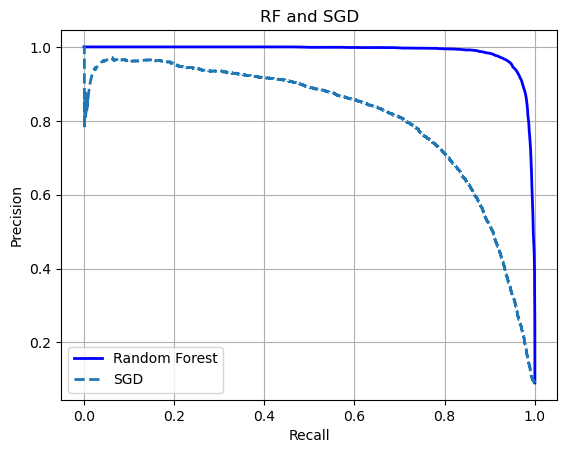

In [32]:
plt.plot(recallForest, preForest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
[...]  # beautify the figure: add labels, grid, and legend
plt.grid()
plt.legend(loc="best")
plt.xlabel("Recall")        # Label for the x-axis
plt.ylabel("Precision")            # Label for the y-axis
plt.title("RF and SGD")  # Title for the plot
plt.show()

# Multiclass Classification

### One-versus-the-Rest (OvR) Strategy

One way to create a system that can classify digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). When you want to classify an image, you get the decision score from each classifier for that image and select the class whose classifier outputs the highest score. This is called the one-versus-the-rest (OvR) strategy, or sometimes one-versus-all (OvA).

### One-versus-One (OvO) Strategy

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.


In [34]:
from sklearn.svm import SVC

svmClassi = SVC(random_state=42)
svmClassi.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [39]:
print(svmClassi.predict([X[0]]))
scores = svmClassi.decision_function([X[0]])
scores

['5']


array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

If you want to force Scikit-Learn to use Ovo or OvR. You can use `OneVsOneClassifier` or `OneVsRestClassifier` classes 

In [41]:
from sklearn.multiclass import OneVsRestClassifier

oVRClassi = OneVsRestClassifier(svmClassi)
oVRClassi.fit(X_train[:2000],y_train[:2000])
oVRClassi.decision_function([X[0]])

array([[-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
         0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052]])

# Error Analysis
## Analyzing Errors to Improve Your Model

Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

First, look at the confusion matrix. For this, you first need to make predictions using the `cross_val_predict()` function; then you can pass the labels and predictions to the `confusion_matrix()` function, just like you did earlier. However, since there are now 10 classes instead of 2, the confusion matrix will contain quite a lot of numbers, and it may be hard to read.

In [46]:
sgdClassi = SGDClassifier(random_state=42)
sgdClassi.fit(X_train,y_train)

In [ ]:
sgdClassi.predict([X[0]]) #wrong prediction

In [ ]:
#increase by scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(X_train)
cross_val_score(sgdClassi, xTrainScaled, y_train, cv=3, scoring="accuracy")
cross_val_score

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
yTrainPred = cross_val_predict(sgdClassi,xTrainScaled,y_train,cv=3)